In [1]:
import numpy as np
import matplotlib.pyplot as plt

from py.params import setParams
from py.analysis import computeFPs, checkFixPtsStability, a_jkValues
from py.analysis import tr, det, lmbd



# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
params={'tau_e': 1, 'tau_i': 0.1,
        'w_ee': 1, 'w_ei': 1.5, 'w_ie': 1, 'w_ii': 0.25,
        'sigma_e': 1, 'sigma_i': 3, 'kernel': 'exponential', 
        'mu_e': 0, 'mu_i': 0, 'beta_e': 50, 'beta_i': 50,
        'I_e': -0.1, 'I_i': -0.4,
        'dt': 0.1, 'start_t': 0, 'end_t': 1000, 
        'n': 62, 'length': 10}
ps = setParams(params)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999999999999999


In [3]:
fps = computeFPs(ps)

Summe von ke, bereits normalisiert, also sollte 1 sein 0.9999999999999999


In [4]:
fps

[array([1.23241817e-02, 3.81703853e-09]),
 array([3.14558007e-02, 9.93427119e-09]),
 array([0.43136703, 0.22459503])]

In [5]:
stab = checkFixPtsStability(fps, ps)

In [6]:
stab

[1, 0, 1]

In [7]:
a_ee, a_ei, a_ie, a_ii = a_jkValues(fps[2], ps)

In [8]:
l=61
k = np.linspace(-3,3,l)
determinant = det(k, a_ee, a_ei, a_ie, a_ii, ps)
trace = tr(k, a_ee, a_ii, ps)
zero = np.zeros(l)

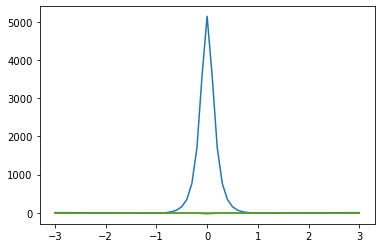

In [9]:
plt.plot(k, determinant, k, trace)
plt.plot(k, zero)

In [10]:
lmbda = lmbd(k, a_ee, a_ei, a_ie, a_ii, ps)

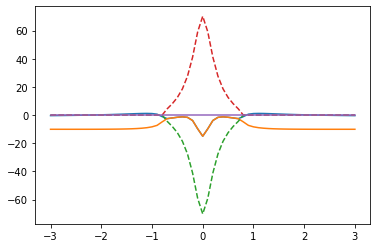

In [11]:
plt.plot(k, lmbda[0].real, k, lmbda[1].real)
plt.plot(k, lmbda[0].imag, k, lmbda[1].imag, linestyle='dashed')
plt.plot(k, zero)

In [12]:
trace2 = lmbda[0]+lmbda[1]
determinant2 = lmbda[0]*lmbda[1]

/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


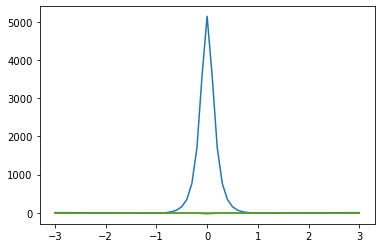

In [13]:
plt.plot(k, determinant2, k, trace2)
plt.plot(k, zero)